## Classify land use using Landsat satellite images
Context: 

    The main aim of this project is to classify land-use with the help of machine learning. 

Datasets: 

    In the project, there are four categories of images which are residential, forest, river and freeway. All other categories will be classified to others. The original size of the images is 256*256 pixels. Originally there are 500 images per class. But they have been divided to three datasets which called train, test and validation. There are 350 images per class in train dataset, 50 images in test dataset and 100 images in validation dataset. 

Acknowledgements:

    Datasets is a part of the previous work of Yi Yang and Shawn Newsam, "Big-Of-Visual-Words and Spatial Extensions for Land-Use Classification", ACM sigspatial international conference on advances in geographic information systems (ACM GIS), 2010. Originally there are 21 classes but this project has selected only 4 classes.

# Inspect the data

In [75]:
# Path process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path
from pathlib import Path
import glob

train_data_path = Path("../dataset/Train")
test_data_path = Path("../dataset/Test")
validation_data_path = Path("../dataset/Validation")
print(train_data_path)


..\dataset\Train


In [76]:
train_path = list(train_data_path.glob(r"*/*.png"))
test_path = list(test_data_path.glob(r"*/*.png"))
validation_path = list(validation_data_path.glob(r"*/*.png"))
print(train_path)

[WindowsPath('../dataset/Train/forest/forest_000001.png'), WindowsPath('../dataset/Train/forest/forest_000003.png'), WindowsPath('../dataset/Train/forest/forest_000005.png'), WindowsPath('../dataset/Train/forest/forest_000006.png'), WindowsPath('../dataset/Train/forest/forest_000008.png'), WindowsPath('../dataset/Train/forest/forest_000009.png'), WindowsPath('../dataset/Train/forest/forest_000010.png'), WindowsPath('../dataset/Train/forest/forest_000012.png'), WindowsPath('../dataset/Train/forest/forest_000013.png'), WindowsPath('../dataset/Train/forest/forest_000014.png'), WindowsPath('../dataset/Train/forest/forest_000015.png'), WindowsPath('../dataset/Train/forest/forest_000016.png'), WindowsPath('../dataset/Train/forest/forest_000018.png'), WindowsPath('../dataset/Train/forest/forest_000019.png'), WindowsPath('../dataset/Train/forest/forest_000020.png'), WindowsPath('../dataset/Train/forest/forest_000024.png'), WindowsPath('../dataset/Train/forest/forest_000025.png'), WindowsPath('

In [77]:
# Label process
train_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_path))
test_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],test_path))
validation_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],validation_path))

In [78]:
labels_list = ["residential", "forest", "freeway", "river"]
for labels in labels_list:
    print(f"{labels}: ", train_labels.count(labels))

residential:  350
forest:  350
freeway:  350
river:  350


In [79]:
for labels in labels_list:
    print(f"{labels}: ", test_labels.count(labels))

residential:  50
forest:  50
freeway:  50
river:  50


In [80]:
for labels in labels_list:
    print(f"{labels}:n", validation_labels.count(labels))

residential:n 100
forest:n 100
freeway:n 100
river:n 100


# Dataframe structure for train dataset

In [103]:
def assign_value(category):
    if category == 'forest' : 
        return 1
    elif category == 'freeway' : 
        return 2
    elif category == 'residential' : 
        return 3
    elif category == 'river' : 
        return 4
    else:
        return None


In [108]:
df = pd.DataFrame({'image': train_path, 'label': train_labels})
df.to_csv('../dataset/path_list.csv', index = False)
df

,image,label
0,..\dataset\Train\forest\forest_000001.png,forest
1,..\dataset\Train\forest\forest_000003.png,forest
2,..\dataset\Train\forest\forest_000005.png,forest
3,..\dataset\Train\forest\forest_000006.png,forest
4,..\dataset\Train\forest\forest_000008.png,forest
...,...,...
1395,..\dataset\Train\river\river_000495.png,river
1396,..\dataset\Train\river\river_000496.png,river
1397,..\dataset\Train\river\river_000497.png,river
1398,..\dataset\Train\river\river_000498.png,river


In [109]:
# Create en column that numbers represent categories.

df['category'] = df['label'].apply(assign_value)
df.to_csv('../dataset/path_list.csv', index = False)
df

,image,label,category
0,..\dataset\Train\forest\forest_000001.png,forest,1
1,..\dataset\Train\forest\forest_000003.png,forest,1
2,..\dataset\Train\forest\forest_000005.png,forest,1
3,..\dataset\Train\forest\forest_000006.png,forest,1
4,..\dataset\Train\forest\forest_000008.png,forest,1
...,...,...,...
1395,..\dataset\Train\river\river_000495.png,river,4
1396,..\dataset\Train\river\river_000496.png,river,4
1397,..\dataset\Train\river\river_000497.png,river,4
1398,..\dataset\Train\river\river_000498.png,river,4


In [111]:
# Shuffling

train_data_shuf = df.sample(frac=1).reset_index(drop=True)
print(train_data_shuf)

                                                  image        label  category
0             ..\dataset\Train\forest\forest_000051.png       forest         1
1               ..\dataset\Train\river\river_000137.png        river         4
2     ..\dataset\Train\residential\denseresidential_...  residential         3
3               ..\dataset\Train\river\river_000459.png        river         4
4     ..\dataset\Train\residential\buildings_000095.png  residential         3
...                                                 ...          ...       ...
1395  ..\dataset\Train\residential\denseresidential_...  residential         3
1396        ..\dataset\Train\freeway\freeway_000122.png      freeway         2
1397          ..\dataset\Train\forest\forest_000480.png       forest         1
1398        ..\dataset\Train\freeway\freeway_000374.png      freeway         2
1399  ..\dataset\Train\residential\mediumresidential...  residential         3

[1400 rows x 3 columns]


# Visualize training images
Plotting random images from train dataset

In [135]:
# Create dataset series

train_data_series = pd.Series(train_path, name = "image").astype(str)
train_labels_series = pd.Series(train_labels, name = "label").astype(str)
train_dataset = pd.concat([train_data_series, train_labels_series], axis=1)
train_dataset

,image,label
0,..\dataset\Train\forest\forest_000001.png,forest
1,..\dataset\Train\forest\forest_000003.png,forest
2,..\dataset\Train\forest\forest_000005.png,forest
3,..\dataset\Train\forest\forest_000006.png,forest
4,..\dataset\Train\forest\forest_000008.png,forest
...,...,...
1395,..\dataset\Train\river\river_000495.png,river
1396,..\dataset\Train\river\river_000496.png,river
1397,..\dataset\Train\river\river_000497.png,river
1398,..\dataset\Train\river\river_000498.png,river


In [183]:
# Shuffling

train_dataset_shuf = train_dataset.sample(frac=1).reset_index(drop=True)
print(train_dataset_shuf)

                                                  image        label
0     ..\dataset\Train\residential\sparseresidential...  residential
1           ..\dataset\Train\freeway\freeway_000491.png      freeway
2           ..\dataset\Train\freeway\freeway_000183.png      freeway
3     ..\dataset\Train\residential\buildings_000078.png  residential
4           ..\dataset\Train\freeway\freeway_000189.png      freeway
...                                                 ...          ...
1395  ..\dataset\Train\residential\mediumresidential...  residential
1396  ..\dataset\Train\residential\denseresidential_...  residential
1397          ..\dataset\Train\forest\forest_000112.png       forest
1398        ..\dataset\Train\freeway\freeway_000096.png      freeway
1399            ..\dataset\Train\river\river_000109.png        river

[1400 rows x 2 columns]


Text(0.5, 1.0, 'freeway')

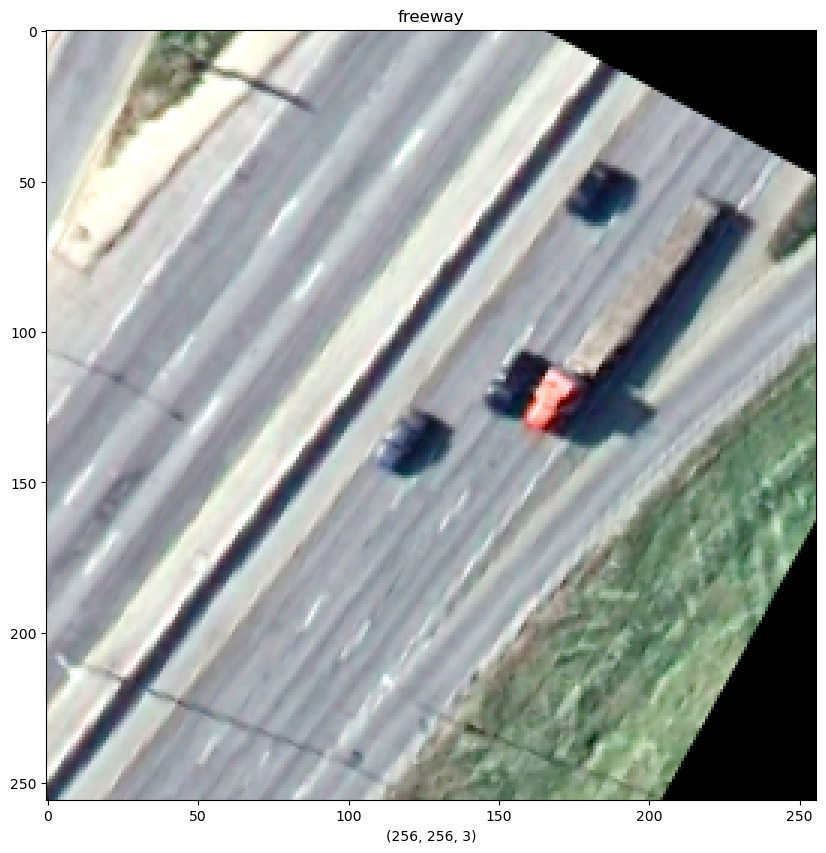

In [185]:
# Plotting one train image

import matplotlib.image as mpimg
from PIL import Image


figure = plt.figure(figsize=(10,10))
x = plt.imread(train_dataset_shuf['image'][20])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(train_dataset_shuf['label'][20])

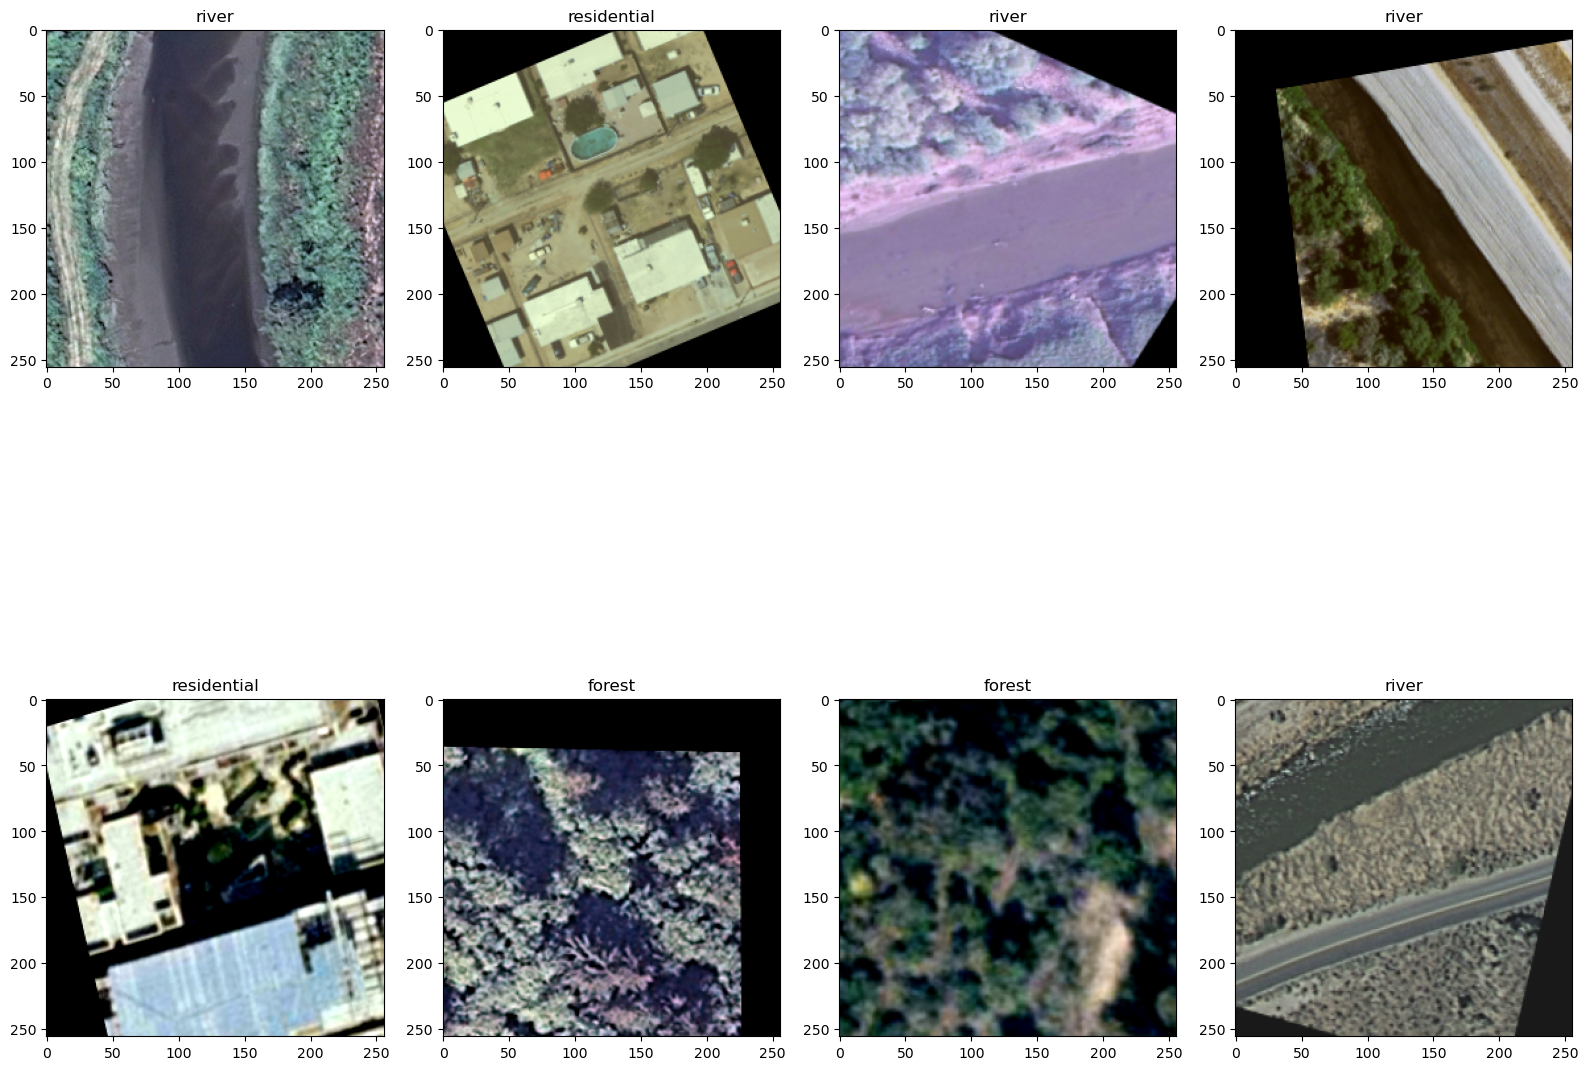

In [209]:
# Plotting random images from train dataset from every class
import random

rows = 2
cols = 4

figure, axis = plt.subplots(rows, cols, figsize=(16,16))

for i, ax in enumerate(axis.flat):
    i = np.random.choice(len(train_dataset))
    ax.imshow(plt.imread(train_dataset['image'][i]))
    ax.set_title(train_dataset["label"][i])
plt.tight_layout()
plt.show()
    